## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_mice=mouse_metadata.merge(study_results,on='Mouse ID')
# Display the data table for preview
print(combine_mice)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [5]:
# Checking the number of mice.
mouse_num=len(combine_mice["Mouse ID"].unique())
print(mouse_num)

249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_dup=combine_mice[combine_mice.duplicated(subset=['Mouse ID'])]
print("select specific column:")
print(mice_dup[['Mouse ID','Timepoint']])

select specific column:
     Mouse ID  Timepoint
1        k403          5
2        k403         10
3        k403         15
4        k403         20
5        k403         25
...       ...        ...
1888     z969         25
1889     z969         30
1890     z969         35
1891     z969         40
1892     z969         45

[1644 rows x 2 columns]


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

mice_dup=combine_mice[combine_mice.duplicated(subset=['Mouse ID'])]
mice_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.mice_dup.loc[mice_dup.Timepoint==45,:]
no_dup=mice_dup.loc[mice_dup.Timepoint==45,:]
no_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [9]:
# Checking the number of mice in the clean DataFrame.
number_mice=len(mice_dup["Mouse ID"].unique())
number_mice

237

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
capomulin_sta=no_dup.loc[no_dup["Drug Regimen"]=="Capomulin"]
regimen_group=no_dup.groupby('Drug Regimen')
regimen_mean=round(regimen_group['Tumor Volume (mm3)'].mean(),2)
regimen_med=round(regimen_group['Tumor Volume (mm3)'].median(),2)
regimen_var=round(regimen_group['Tumor Volume (mm3)'].var(),2)
regimen_sd=round(regimen_group['Tumor Volume (mm3)'].std(),2)
regimen_sem=round(regimen_group['Tumor Volume (mm3)'].sem(),2)
summary_df=pd.DataFrame({"regimen_mean","regimen_med","regimen_var",'regimen_sd','regimen_sem'})
new=pd.merge(regimen_mean,regimen_med,on="Drug Regimen")
new1=pd.merge(new,regimen_var,on="Drug Regimen")
new2=pd.merge(new1,regimen_sd, on="Drug Regimen")
new3=pd.merge(new2,regimen_sem, on="Drug Regimen")
new3

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,36.24,37.31,31.46,5.61,1.22
Ceftamin,64.13,64.30,10.59,3.25,0.90
Infubinol,65.76,66.08,11.79,3.43,1.14
Ketapril,70.66,69.87,23.23,4.82,1.45
Naftisol,69.27,69.56,26.08,5.11,1.42
Placebo,68.08,69.04,20.10,4.48,1.35
Propriva,66.26,64.96,24.97,5.00,1.89
Ramicane,34.96,34.85,30.10,5.49,1.23
Stelasyn,68.44,69.30,27.34,5.23,1.58


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cap_sta=no_dup.loc[no_dup["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
cef_sta=no_dup.loc[no_dup["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
inf_sta=no_dup.loc[no_dup["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"]
ket_sta=no_dup.loc[no_dup["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"]
naf_sta=no_dup.loc[no_dup["Drug Regimen"]=="Ketapril","Tumor Volume (mm3)"]
pla_sta=no_dup.loc[no_dup["Drug Regimen"]=="Placebo","Tumor Volume (mm3)"]
pro_sta=no_dup.loc[no_dup["Drug Regimen"]=="Propriva","Tumor Volume (mm3)"]
ram_sta=no_dup.loc[no_dup["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]
ste_sta=no_dup.loc[no_dup["Drug Regimen"]=="Stelasyn","Tumor Volume (mm3)"]
zon_sta=no_dup.loc[no_dup["Drug Regimen"]=="Zoniferol","Tumor Volume (mm3)"]
print(cap_sta.mean(), cap_sta.var(),cap_sta.std(),cap_sta.median(),cap_sta.sem())
print(cef_sta.mean(), cef_sta.var(),cef_sta.std(),cef_sta.median(),cef_sta.sem())
print(inf_sta.mean(), inf_sta.var(),inf_sta.std(),inf_sta.median(),inf_sta.sem())
print(ket_sta.mean(), ket_sta.var(),ket_sta.std(),ket_sta.median(),ket_sta.sem())
print(naf_sta.mean(), naf_sta.var(),naf_sta.std(),naf_sta.median(),naf_sta.sem())
print(pla_sta.mean(), pla_sta.var(),pla_sta.std(),pla_sta.median(),pla_sta.sem())
print(pro_sta.mean(), pro_sta.var(),pro_sta.std(),pro_sta.median(),pro_sta.sem())
print(ram_sta.mean(), ram_sta.var(),ram_sta.std(),ram_sta.median(),ram_sta.sem())
print(ste_sta.mean(), ste_sta.var(),ste_sta.std(),ste_sta.median(),ste_sta.sem())
print(zon_sta.mean(), zon_sta.var(),zon_sta.std(),zon_sta.median(),zon_sta.sem())


36.2361138 31.46053699547494 5.608969334510124 37.31184577 1.2239774545751774
36.2361138 31.46053699547494 5.608969334510124 37.31184577 1.2239774545751774
64.13242133615384 10.585242391839403 3.2534969481835083 64.29983003 0.9023576977877882
65.75556227777778 11.787426314090972 3.4332821489197434 66.08306589 1.1444273829732479
70.66295760818183 23.229260261496457 4.819674289980233 69.87225079 1.4531864755988182
68.08408221818182 20.098782934509767 4.483166619088539 69.04284082 1.3517255952875322
66.25852868857143 24.9672904469809 4.99672797408273 64.95756185 1.8885856554946425
34.955594792 30.101009536516088 5.486438693407235 34.848627300000004 1.2268049872843705
68.43831043090908 27.34081776792383 5.22884478330767 69.29914907 1.5765560212035206
65.96088788928571 14.100300931175136 3.7550367416544854 65.68468877999999 1.0035757830013612


## Bar and Pie Charts

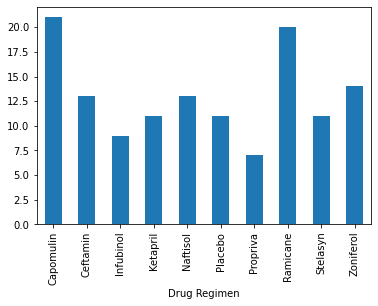

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_regimen=regimen_group['Drug Regimen'].count()
bar_chart=count_regimen.plot(kind='bar')


<BarContainer object of 10 artists>

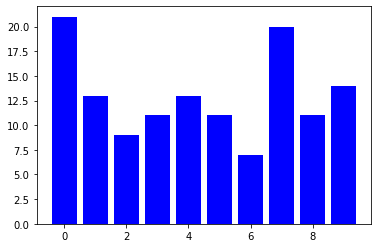

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=np.arange(len(count_regimen))
plt.bar(x_axis, count_regimen, color="b", align="center")


In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_tv=no_dup.loc[no_dup["Drug Regimen"]=='Capomulin',:]
ramicane_tv=no_dup.loc[no_dup["Drug Regimen"]=='Ramicane',:]
Infubinol_tv=no_dup.loc[no_dup["Drug Regimen"]=='Infubinol',:]
Ceftamin_tv=no_dup.loc[no_dup["Drug Regimen"]=='Ceftamin',:]
cap_tv=capomulin_tv[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
ram_tv=ramicane_tv[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
inf_tv=Infubinol_tv[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
cef_tv=Ceftamin_tv[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

In [21]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = no_dup.quantile([.1,.5,.9])
lowerq = quartiles[0.1]
upperq = quartiles[0.9]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

KeyError: 0.1

<AxesSubplot:xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)'>

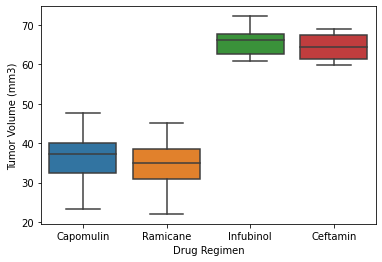

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
tumor_v=capomulin_tv[["Tumor Volume (mm3)"]]
all_re=pd.concat([cap_tv,ram_tv,inf_tv,cef_tv])
sns.boxplot(x='Drug Regimen',y='Tumor Volume (mm3)',data=all_re)

## Line and Scatter Plots

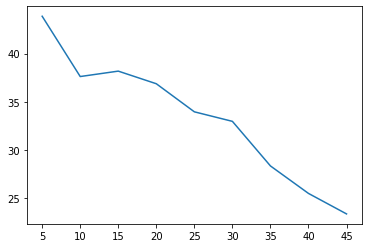

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_tv=mice_dup.loc[mice_dup["Drug Regimen"]=="Capomulin",:]
time_tv=capo_tv[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
s185_tv=time_tv.loc[time_tv["Mouse ID"]=="s185",:]
s_185=s185_tv[["Timepoint","Tumor Volume (mm3)"]]
s185_t=s_185[["Timepoint"]]
s185_tu=s_185[["Tumor Volume (mm3)"]]
plt.plot(s185_t,s185_tu)

<AxesSubplot:xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

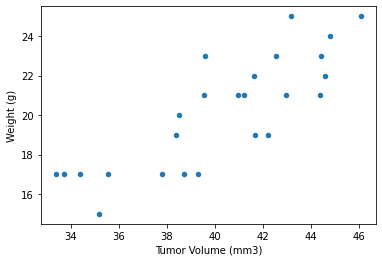

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_tv=capo_tv[["Mouse ID","Weight (g)","Tumor Volume (mm3)","Drug Regimen"]]
weight_group=weight_tv.groupby("Mouse ID")
mean_tu=weight_group.mean()
mean_tu.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


Text(40, 16, 'y = 0.64x + -5.64')

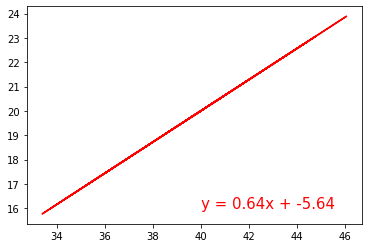

In [50]:
x_values= mean_tu['Tumor Volume (mm3)']
y_values= mean_tu['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,16),fontsize=15,color="red")